In [21]:
!pip install torchviz

In [22]:
import torch
from torchviz import make_dot

# Problem Statement: Predict the pattern using training data

In [23]:
# It is evident that y is a sum of elements of x
x = [[1,2],[3,4],[5,6],[7,8]]
y = [[3],[7],[11],[15]]

In [24]:
# Converting lists to tensors to be able to use with pytorch
X = torch.tensor(x).float()
Y = torch.tensor(y).float()
# .float is to convert the datatype to float

# To use GPU on google colab, you would need to change the runtime type to GPU

In [25]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

cuda


In [26]:
X = X.to(device)
Y = Y.to(device)

# To create a custom PyTorch Model, we need to inherit from the nn.Module class.

In [27]:
# nn means Neural Network
import torch.nn as nn

In [28]:
class MyNeuralNet(nn.Module):
  def __init__(self):  
    # When we call the super.__init__() method we ensure we are inhertiting   
    super().__init__()
    self.layer1 = nn.Linear(2,8) # A linear layer
    self.activation = nn.ReLU() # activation function
    self.layer2 =  nn.Linear(8,1)

  # When we pass something through the model object, it calls the forward method 
  def forward(self,x):
    x = self.layer1(x)
    x = self.activation(x)
    x = self.layer2(x)
    return x

When you pass a tensor of shape (4,2) through nn.Linear(2,8), it will undergo a linear transformation, which involves multiplying the input tensor by a weight matrix of size (input_size, output_size) and adding a bias vector of size (output_size).

In this case, the weight matrix would have size (2,8) because the input tensor has 2 features and the linear layer has 8 output features. The bias vector would have size (8) to match the output size.

The resulting tensor would have shape (4,8) because the linear transformation would produce 8 output features for each of the 4 input examples in the batch.

This process is commonly used in neural networks for tasks such as classification, where the linear layer is often followed by a non-linear activation function to introduce non-linearity into the network.

The final matrix would be of shape (4,1)

In [29]:
model = MyNeuralNet()

# To visualize the architecture of the model

In [30]:
make_dot(model(X), params=dict(model.named_parameters())).render("dense_network", format="png")

RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cpu and cuda:0! (when checking argument for argument mat1 in method wrapper_CUDA_addmm)

In [ ]:
X.shape

torch.Size([4, 2])

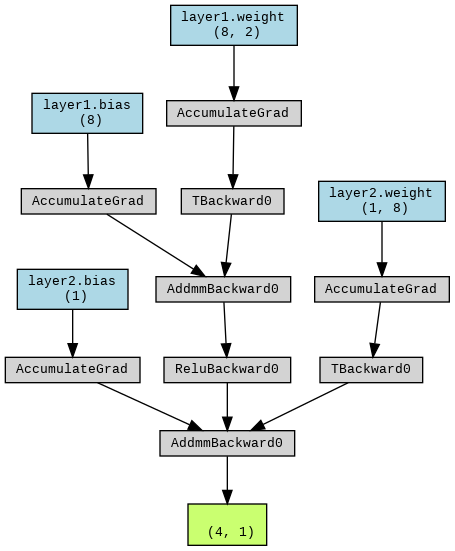

# To obtain the weight matrix

In [ ]:
model.layer1.weight

Parameter containing:
tensor([[ 0.2310, -0.6621],
        [ 0.2473,  0.1435],
        [ 0.0909,  0.0438],
        [-0.0081, -0.1537],
        [-0.1675,  0.1962],
        [-0.6639,  0.1805],
        [-0.4129, -0.5283],
        [ 0.5684, -0.6178]], requires_grad=True)

# Parameters

In [ ]:
model.parameters().__next__()

Parameter containing:
tensor([[ 6.4785e-01,  2.2869e-04],
        [ 7.0527e-01,  4.9496e-01],
        [-1.5067e-01,  1.1374e-01],
        [ 5.0802e-01, -5.9563e-01],
        [-5.3761e-01,  5.5177e-01],
        [ 7.0310e-01,  9.5410e-02],
        [ 1.4556e-01,  2.7402e-02],
        [-6.7270e-01,  2.8174e-01]], requires_grad=True)